<a href="https://colab.research.google.com/github/momo4201/AI-ML-projects/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#create a model class that inherits nn.Module
class Model(nn.Module):
  #input layer(4 features of the flower)-->
  #hidden layer1(no. of neurons)--->
  #H2(n)---->
  #output (3 classes of iris flowers)
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn. moddule
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
# we need to create a function that moves everything forward
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [ ]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head(6)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [ ]:
my_df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
#change last column from strings to integers
my_df['species']= my_df['species'].replace('setosa', 0.0)
my_df['species']= my_df['species'].replace('versicolor', 1.0)
my_df['species']= my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-7-2402342713.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']= my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#train test split
X = my_df.drop('species', axis=1)
y = my_df['species'].values

In [ ]:
#convert these to numpy array
X = X.values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
#convert nympy arrays to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test) # long tensors are 64 bit inegers

In [ ]:
#set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#choose adam optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
#train our model
#epochs (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted results
  #measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train value
  #keep track of our losses
  losses.append(loss.detach().numpy())
  #print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #do some backpropagation : take the error rate of forward propagation and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss: 0.05286576226353645
Epoch: 10 and loss: 0.04508381709456444
Epoch: 20 and loss: 0.03979949280619621
Epoch: 30 and loss: 0.035970740020275116
Epoch: 40 and loss: 0.03293721750378609
Epoch: 50 and loss: 0.03041938506066799
Epoch: 60 and loss: 0.026795217767357826
Epoch: 70 and loss: 0.02338254824280739
Epoch: 80 and loss: 0.020531881600618362
Epoch: 90 and loss: 0.018495969474315643
Epoch: 100 and loss: 0.016802635043859482
Epoch: 110 and loss: 0.015519778244197369
Epoch: 120 and loss: 0.014496986754238605
Epoch: 130 and loss: 0.013443661853671074
Epoch: 140 and loss: 0.012677091173827648
Epoch: 150 and loss: 0.011877342127263546
Epoch: 160 and loss: 0.01128967385739088
Epoch: 170 and loss: 0.010908301919698715
Epoch: 180 and loss: 0.010098334401845932
Epoch: 190 and loss: 0.009513933211565018


Text(0.5, 0, 'Epoch')

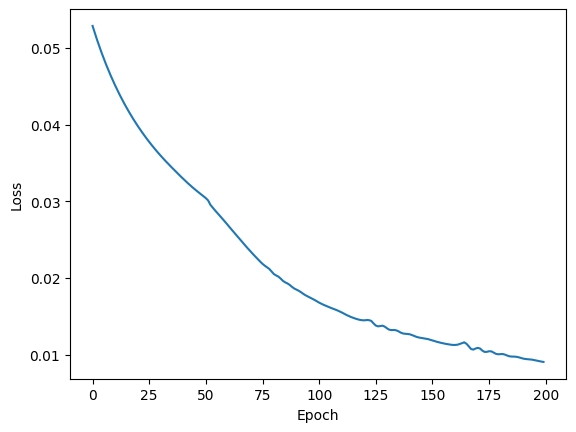

In [ ]:
#graph it
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
""" Evaluation"""
with torch.no_grad():
  #basically turn off the back propagation
  y_eval = model.forward(X_test) #X_tests are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) #find the loss or error






In [ ]:
loss

tensor(0.2781)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t{y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct!')

1.) tensor([-7.4286,  2.6534, 11.5220]) 	2
2.) tensor([-10.2193,  -0.2539,  18.8748]) 	2
3.) tensor([-11.6174,   0.4803,  20.4276]) 	2
4.) tensor([-0.4340, 11.2773, -5.1820]) 	1
5.) tensor([-9.7954,  1.4611, 16.3171]) 	2
6.) tensor([  3.3108,  13.8617, -12.1604]) 	1
7.) tensor([-6.5373,  4.4835,  8.9461]) 	2
8.) tensor([-0.1092, 11.7033, -5.9751]) 	1
9.) tensor([-8.2913,  2.8493, 12.8296]) 	2
10.) tensor([-10.9211,  -0.3205,  20.1290]) 	2
11.) tensor([-5.7450,  5.1513,  7.2486]) 	2
12.) tensor([ 29.1192,  19.2300, -46.1899]) 	0
13.) tensor([ 26.4095,  17.3970, -41.8028]) 	0
14.) tensor([  5.2845,  12.3577, -13.5614]) 	1
15.) tensor([ 24.9035,  17.9470, -40.4210]) 	0
16.) tensor([-4.6762,  6.5071,  4.6870]) 	2
17.) tensor([ 26.4824,  17.7967, -42.1727]) 	0
18.) tensor([-6.7439,  3.5992,  9.8381]) 	1
19.) tensor([ 28.0708,  18.5240, -44.4948]) 	0
20.) tensor([ 23.0914,  16.2081, -37.1734]) 	0
21.) tensor([  4.5541,  12.9620, -13.0719]) 	1
22.) tensor([-10.5505,   0.5818,  18.5301]) 	2
23

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t{y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct!')

1.) tensor([-7.4286,  2.6534, 11.5220]) 	2 	 2
2.) tensor([-10.2193,  -0.2539,  18.8748]) 	2 	 2
3.) tensor([-11.6174,   0.4803,  20.4276]) 	2 	 2
4.) tensor([-0.4340, 11.2773, -5.1820]) 	1 	 1
5.) tensor([-9.7954,  1.4611, 16.3171]) 	2 	 2
6.) tensor([  3.3108,  13.8617, -12.1604]) 	1 	 1
7.) tensor([-6.5373,  4.4835,  8.9461]) 	2 	 2
8.) tensor([-0.1092, 11.7033, -5.9751]) 	1 	 1
9.) tensor([-8.2913,  2.8493, 12.8296]) 	2 	 2
10.) tensor([-10.9211,  -0.3205,  20.1290]) 	2 	 2
11.) tensor([-5.7450,  5.1513,  7.2486]) 	2 	 2
12.) tensor([ 29.1192,  19.2300, -46.1899]) 	0 	 0
13.) tensor([ 26.4095,  17.3970, -41.8028]) 	0 	 0
14.) tensor([  5.2845,  12.3577, -13.5614]) 	1 	 1
15.) tensor([ 24.9035,  17.9470, -40.4210]) 	0 	 0
16.) tensor([-4.6762,  6.5071,  4.6870]) 	2 	 1
17.) tensor([ 26.4824,  17.7967, -42.1727]) 	0 	 0
18.) tensor([-6.7439,  3.5992,  9.8381]) 	1 	 2
19.) tensor([ 28.0708,  18.5240, -44.4948]) 	0 	 0
20.) tensor([ 23.0914,  16.2081, -37.1734]) 	0 	 0
21.) tensor([  4

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    #will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct!')

1.) tensor([-7.4286,  2.6534, 11.5220]) 	 Virginica 	 2
2.) tensor([-10.2193,  -0.2539,  18.8748]) 	 Virginica 	 2
3.) tensor([-11.6174,   0.4803,  20.4276]) 	 Virginica 	 2
4.) tensor([-0.4340, 11.2773, -5.1820]) 	 Versicolor 	 1
5.) tensor([-9.7954,  1.4611, 16.3171]) 	 Virginica 	 2
6.) tensor([  3.3108,  13.8617, -12.1604]) 	 Versicolor 	 1
7.) tensor([-6.5373,  4.4835,  8.9461]) 	 Virginica 	 2
8.) tensor([-0.1092, 11.7033, -5.9751]) 	 Versicolor 	 1
9.) tensor([-8.2913,  2.8493, 12.8296]) 	 Virginica 	 2
10.) tensor([-10.9211,  -0.3205,  20.1290]) 	 Virginica 	 2
11.) tensor([-5.7450,  5.1513,  7.2486]) 	 Virginica 	 2
12.) tensor([ 29.1192,  19.2300, -46.1899]) 	 Setosa 	 0
13.) tensor([ 26.4095,  17.3970, -41.8028]) 	 Setosa 	 0
14.) tensor([  5.2845,  12.3577, -13.5614]) 	 Versicolor 	 1
15.) tensor([ 24.9035,  17.9470, -40.4210]) 	 Setosa 	 0
16.) tensor([-4.6762,  6.5071,  4.6870]) 	 Virginica 	 1
17.) tensor([ 26.4824,  17.7967, -42.1727]) 	 Setosa 	 0
18.) tensor([-6.7439,